In [1]:
# Suprimir advertencias:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import numpy as np
import pandas as pd

In [5]:
data = pd.read_csv('DatosCaza_2015_2023_Limpios.csv', delimiter=",")
data.head()

,Ano,Encabezado,Cespe,Especie,Cintiauto,Cintientrega,Epocainicio,EpocaFin
0,2015,REPORTE DE LA FAUNA SILVESTRE DE LA TEMPORADA ...,1,ANTILOPE ACUATICO,20,0,25/09/2015,24/09/2016
1,2016,REPORTE DE LA FAUNA SILVESTRE DE LA TEMPORADA ...,1,ANTILOPE ACUATICO,20,0,09/09/2016,28/05/2017
2,2017,REPORTE DE LA FAUNA SILVESTRE DE LA TEMPORADA ...,1,ANTILOPE ACUATICO,10,0,09/09/2017,28/05/2018
3,2018,REPORTE DE LA FAUNA SILVESTRE DE LA TEMPORADA ...,1,ANTILOPE ACUATICO,20,0,28/05/2018,28/05/2019
4,2019,REPORTE DE LA FAUNA SILVESTRE DE LA TEMPORADA ...,1,ANTILOPE ACUATICO,0,0,28/05/2019,28/05/2020


In [6]:
data = data.drop(['Encabezado'], axis=1)
data.head()

,Ano,Cespe,Especie,Cintiauto,Cintientrega,Epocainicio,EpocaFin
0,2015,1,ANTILOPE ACUATICO,20,0,25/09/2015,24/09/2016
1,2016,1,ANTILOPE ACUATICO,20,0,09/09/2016,28/05/2017
2,2017,1,ANTILOPE ACUATICO,10,0,09/09/2017,28/05/2018
3,2018,1,ANTILOPE ACUATICO,20,0,28/05/2018,28/05/2019
4,2019,1,ANTILOPE ACUATICO,0,0,28/05/2019,28/05/2020


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Ano           406 non-null    int64 
 1   Cespe         406 non-null    int64 
 2   Especie       406 non-null    object
 3   Cintiauto     406 non-null    int64 
 4   Cintientrega  406 non-null    int64 
 5   Epocainicio   406 non-null    object
 6   EpocaFin      406 non-null    object
dtypes: int64(4), object(3)
memory usage: 22.3+ KB


In [9]:
data.describe()

,Ano,Cespe,Cintiauto,Cintientrega
count,406.000000,406.000000,406.000000,406.000000
mean,2018.874384,25.344828,435.866995,209.955665
std,2.501651,14.262419,1182.669833,623.011617
min,2015.000000,1.000000,0.000000,0.000000
25%,2017.000000,13.000000,0.250000,0.000000
50%,2019.000000,25.500000,18.000000,4.000000
75%,2021.000000,38.000000,111.500000,43.750000
max,2023.000000,50.000000,5876.000000,3769.000000


In [10]:
data_Limpio = data.dropna()
data_Limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Ano           406 non-null    int64 
 1   Cespe         406 non-null    int64 
 2   Especie       406 non-null    object
 3   Cintiauto     406 non-null    int64 
 4   Cintientrega  406 non-null    int64 
 5   Epocainicio   406 non-null    object
 6   EpocaFin      406 non-null    object
dtypes: int64(4), object(3)
memory usage: 22.3+ KB


In [11]:
data_Limpio.describe()

,Ano,Cespe,Cintiauto,Cintientrega
count,406.000000,406.000000,406.000000,406.000000
mean,2018.874384,25.344828,435.866995,209.955665
std,2.501651,14.262419,1182.669833,623.011617
min,2015.000000,1.000000,0.000000,0.000000
25%,2017.000000,13.000000,0.250000,0.000000
50%,2019.000000,25.500000,18.000000,4.000000
75%,2021.000000,38.000000,111.500000,43.750000
max,2023.000000,50.000000,5876.000000,3769.000000


In [12]:
data_Limpio.corr()

,Ano,Cespe,Cintiauto,Cintientrega
Ano,1.000000,0.047791,0.028736,0.024299
Cespe,0.047791,1.000000,0.346307,0.355406
Cintiauto,0.028736,0.346307,1.000000,0.940870
Cintientrega,0.024299,0.355406,0.940870,1.000000


<Axes: >

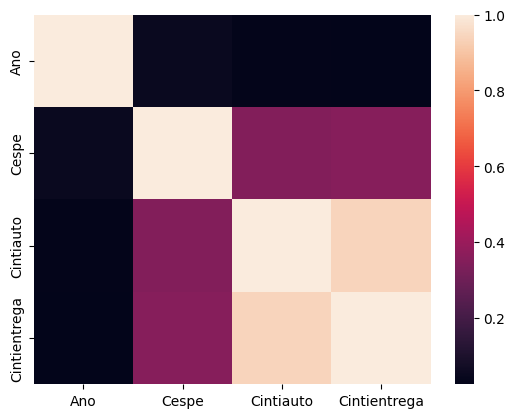

In [13]:
import seaborn as sns
%matplotlib inline

sns.heatmap(data_Limpio.corr())

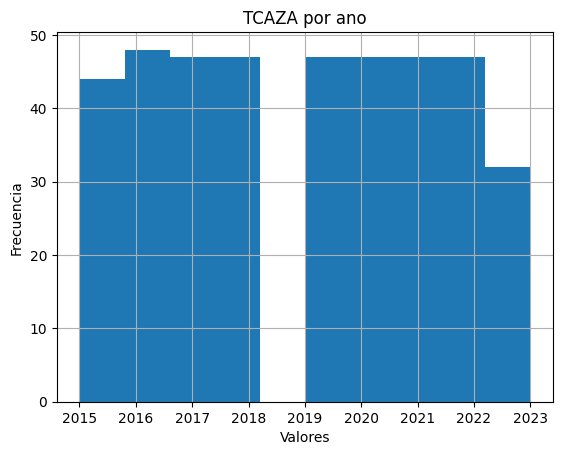

In [15]:
import matplotlib.pyplot as plt
# Plot a histogram of a single column in the DataFrame
data_Limpio.hist(column='Ano')

# Set the title and axis labels
plt.title('TCAZA por ano')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Display the histogram
plt.show()

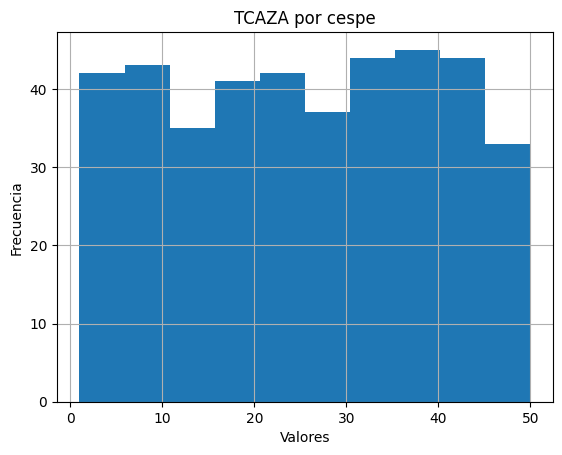

In [17]:
# Plot a histogram of a single column in the DataFrame
data_Limpio.hist(column='Cespe')

# Set the title and axis labels
plt.title('TCAZA por cespe')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Display the histogram
plt.show()

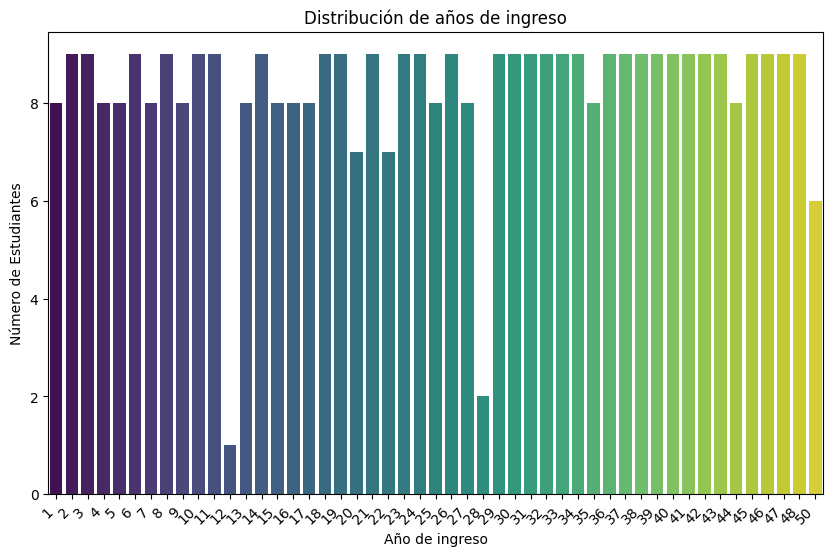

In [19]:
# Contar el número de cespe por temporada
Cespe_counts = data_Limpio['Cespe'].value_counts()


plt.figure(figsize=(10, 6))
sns.barplot(x=Cespe_counts.index, y=Cespe_counts.values, palette='viridis')
plt.title('Distribución de años de ingreso')
plt.xlabel('Año de ingreso')
plt.ylabel('Número de Estudiantes')
plt.xticks(rotation=45, ha='right')
plt.show()

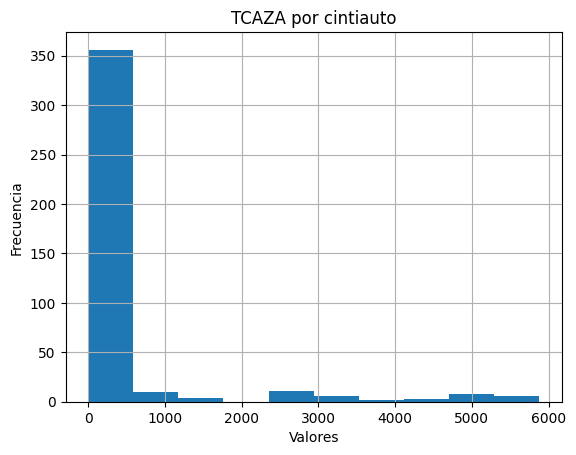

In [ ]:
# Plot a histogram of a single column in the DataFrame
data_Limpio.hist(column='cintiauto')

# Set the title and axis labels
plt.title('TCAZA por cintiauto')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Display the histogram
plt.show()

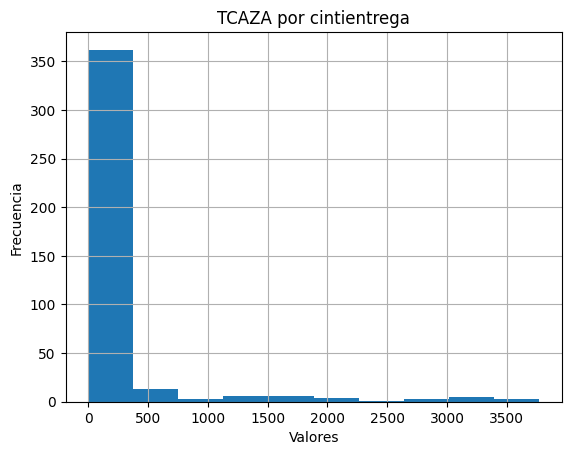

In [ ]:
# Plot a histogram of a single column in the DataFrame
data_Limpio.hist(column='cintientrega')

# Set the title and axis labels
plt.title('TCAZA por cintientrega')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Display the histogram
plt.show()